In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
ds_folder = "../../Datasets/"

In [3]:
celeba_folder = ds_folder + "celeba/"
cartoon_folder = ds_folder + "cartoon_set/"

In [4]:
cols_celeba = ['img_name', 'gender', 'smiling']
cols_cartoon = ['img_name', 'eye_color', 'face_shape']

In [5]:
## the the file labels.csv of the cartoon ds has been rewritten to have 
## the same columns names of the celeba ds and in the same order (img_name, var1, var2)
## for consistency

celeba_df = pd.read_csv(celeba_folder+"labels.csv", sep="\t", header=0, names=cols_celeba)
cartoon_df = pd.read_csv(cartoon_folder+"labels.csv", sep="\t", header=0, names=cols_cartoon)

In [22]:
cartoon_df.dtypes

img_name      object
eye_color      int64
face_shape     int64
dtype: object

In [23]:
celeba_df.dtypes

img_name    object
gender       int64
smiling      int64
dtype: object

# CHECKING THE VARIABLES DISTRIBUTION

### All 4 variable (gender, smiling, eye_color, face_shape) seem to be equally distributed, this meens that both datasets are balanced.

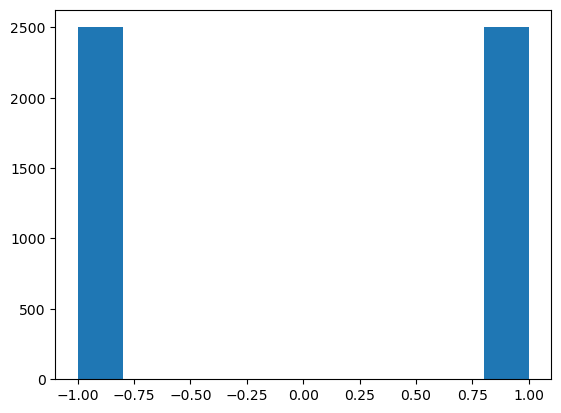

In [11]:
plt.hist(celeba_df['gender'])
plt.show()

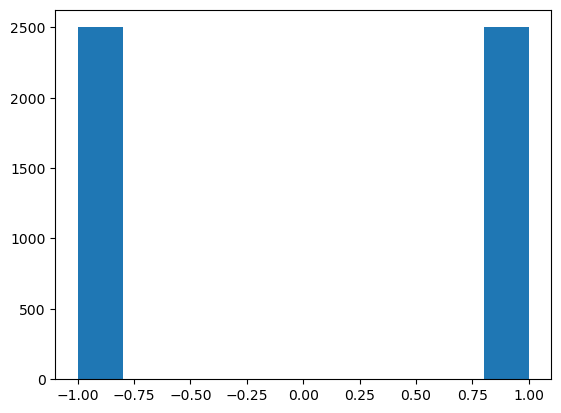

In [12]:
plt.hist(celeba_df['smiling'])
plt.show()

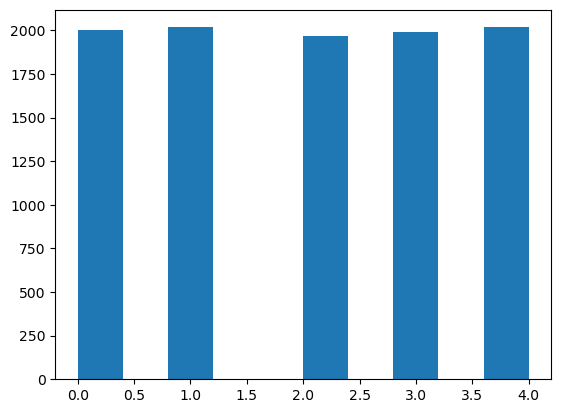

In [19]:
plt.hist(cartoon_df['eye_color'])
plt.show()

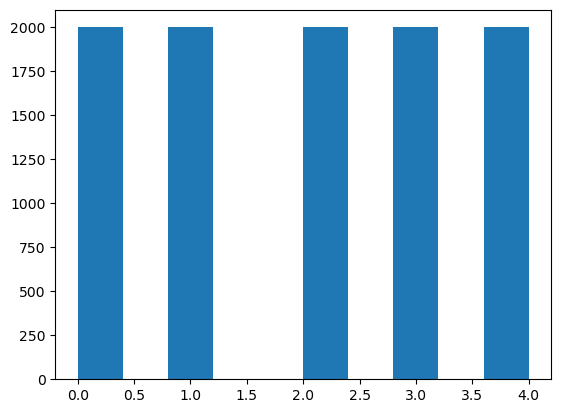

In [20]:
plt.hist(cartoon_df['face_shape'])
plt.show()

# CHECKING FOR NaN VALUES, EMPTY VALUES OR INCONSISTENCY
### None NaN or empty values found

In [47]:
# checking for empty values or NaN values in the variable 'gender'
np.unique(celeba_df['gender'], return_counts=True)

(array([-1,  1]), array([2500, 2500]))

In [27]:
# checking for empty values or NaN values in the variable 'smiling'
np.unique(celeba_df['smiling'], return_counts=True)

(array([-1,  1]), array([2500, 2500]))

In [28]:
# checking for empty values or NaN values in the variable 'eye_color'
np.unique(cartoon_df['eye_color'], return_counts=True)

(array([0, 1, 2, 3, 4]), array([2004, 2018, 1969, 1992, 2017]))

In [48]:
# checking for empty values or NaN values in the variable 'face_shape'
np.unique(cartoon_df['face_shape'], return_counts=True)

(array([0, 1, 2, 3, 4]), array([2000, 2000, 2000, 2000, 2000]))

In [43]:
## checking that the img_name values are all different
print(np.unique(np.unique(cartoon_df['img_name'], return_counts=True)[1]))
print(np.unique(np.unique(celeba_df['img_name'], return_counts=True)[1]))

[1]
[1]


# CHECKING SHAPE OF THE IMAGES
### The images have all the same shape:
   ### - (178, 218, 3) for the CelebA ds
   ### - (500, 500, 4) for the Cartoon ds
   
   
### Note: the Cartoon images have a forth dimension in addition to

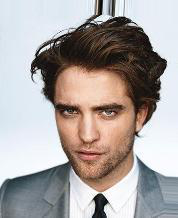

In [71]:
## sample images

img1 = Image.open(celeba_folder+"img/3884.jpg") 
img2 = Image.open(cartoon_folder+"img/3884.png") 
img1

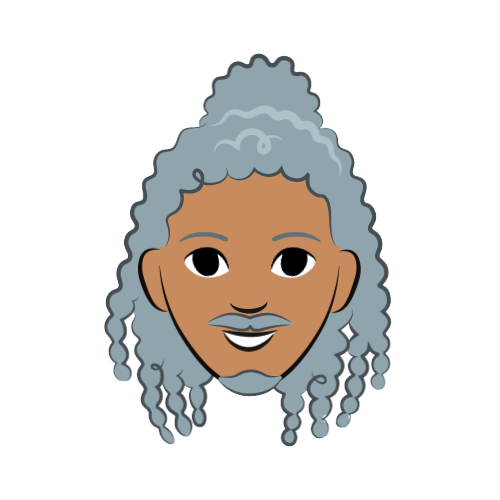

In [72]:
img2

In [73]:
img1.size, img2.size

((178, 218), (500, 500))

In [79]:
np.array(img2).shape

(500, 500, 4)

In [80]:
np.array(img1).shape

(218, 178, 3)

In [81]:
### check they all have the same shape

shape_array_x = []
shape_array_y = []
shape_array_z = []


for x in range(5000):
    img = Image.open(celeba_folder+"img/"+str(x)+".jpg") 
    shape_array_x.append(np.array(img).shape[0])
    shape_array_y.append(np.array(img).shape[1])
    shape_array_z.append(np.array(img).shape[2])

In [82]:
np.unique(shape_array_x, return_counts=True)

(array([218]), array([5000]))

In [83]:
np.unique(shape_array_y, return_counts=True)

(array([178]), array([5000]))

In [84]:
np.unique(shape_array_z, return_counts=True)

(array([3]), array([5000]))

In [85]:
### check they all have the same shape

shape_array_x = []
shape_array_y = []
shape_array_z = []

for x in range(10000):
    img = Image.open(cartoon_folder+"img/"+str(x)+".png") 
    shape_array_x.append(np.array(img).shape[0])
    shape_array_y.append(np.array(img).shape[1])
    shape_array_z.append(np.array(img).shape[2])

In [86]:
np.unique(shape_array_x, return_counts=True)

(array([500]), array([10000]))

In [87]:
np.unique(shape_array_y, return_counts=True)

(array([500]), array([10000]))

In [88]:
np.unique(shape_array_z, return_counts=True)

(array([4]), array([10000]))

In [ ]:
#### check the values of the forth value of the third dimension of the cartoon images

array = []

for index in range(10000):
    img = Image.open(cartoon_folder+"img/"+str(index)+".png") 
    
    for x in range(500):
        for y in range(500):
            array.append(np.array(img)[x][y][3])

In [ ]:
np.unique(array, return_counts=True)